# Exploratory Data Analysis Starter

## Import packages

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [53]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [54]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [55]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [56]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [57]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [58]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [59]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [60]:
client_df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [61]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

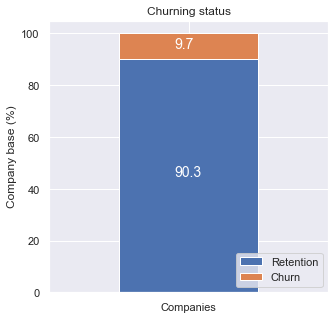

In [62]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [63]:
client_df['channel_sales'] = client_df['channel_sales'].astype('category')
client_df['channel_sales'] = client_df['channel_sales'].cat.codes
client_df['channel_sales'].value_counts()

4    6754
0    3725
5    1843
7    1375
2     893
6      11
1       3
3       2
Name: channel_sales, dtype: int64

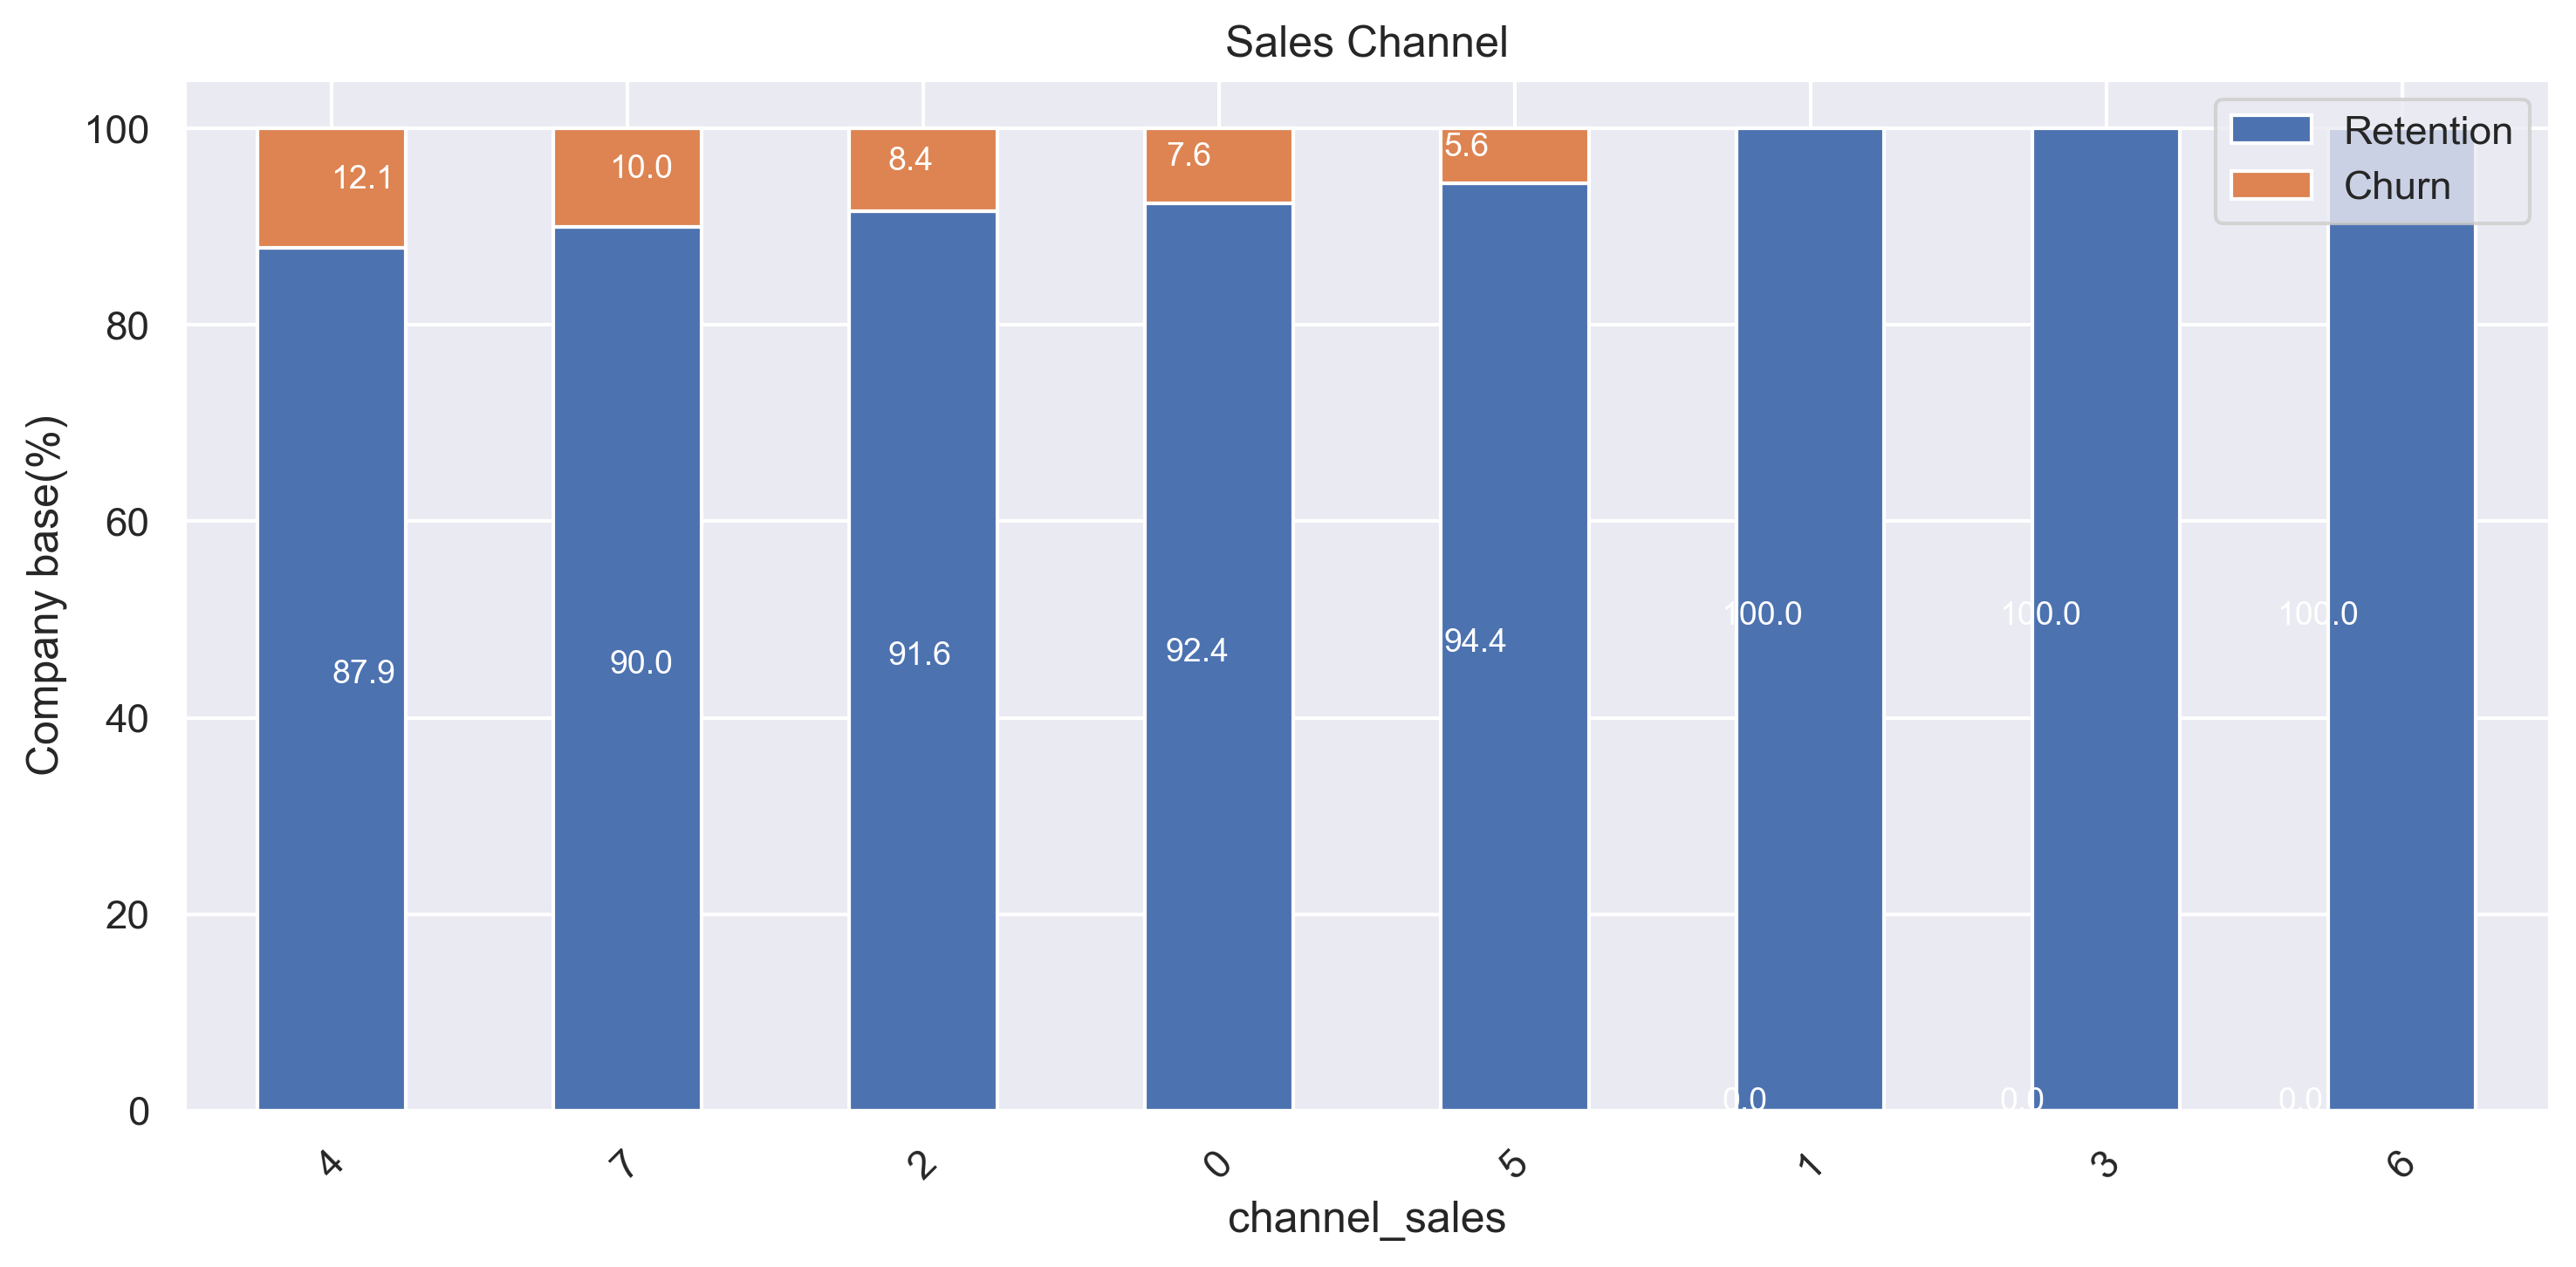

In [81]:
channel=client_df[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)

channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 300
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(10,5),rot=45)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.94,p.get_y()+p.get_height()/2*0.99),
               color='white',size=(9))
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

Encode channel_sales. Visulise the percentage of churn across diff channel sales.

In [67]:
client_df['origin_up'] = client_df['origin_up'].astype('category')
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [68]:
client_df['origin_up'] = client_df['origin_up'].cat.codes
client_df['origin_up'].value_counts()

4    7097
2    4294
3    3148
0      64
5       2
1       1
Name: origin_up, dtype: int64

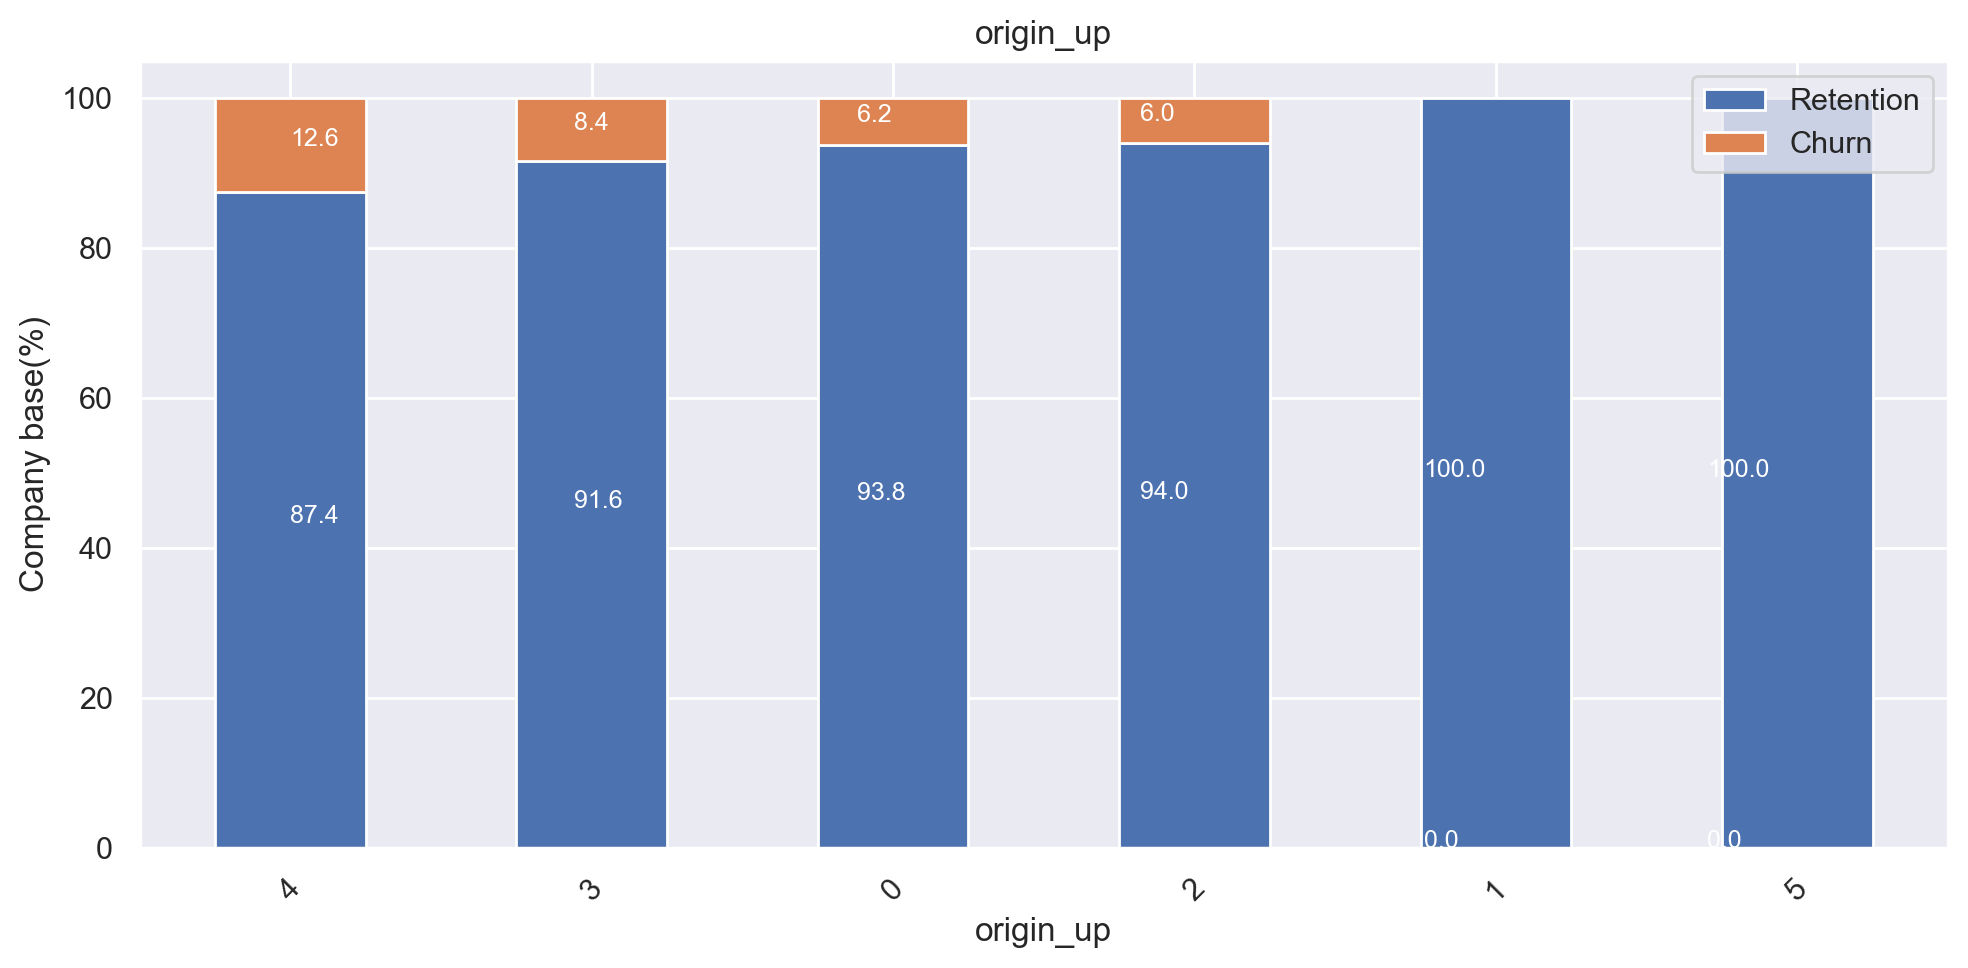

In [87]:
channel=client_df[['id','origin_up','churn']]
channel=channel.groupby([channel['origin_up'],channel['churn']])['id'].count().unstack(level=1).fillna(0)

channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 200
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(10,5),rot=45)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.94,p.get_y()+p.get_height()/2*0.99),
               color='white',size=(9))
plt.title('origin_up')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [28]:
client_df = client_df.drop(client_df.index[client_df['origin_up']==5])
client_df = client_df.drop(client_df.index[client_df['origin_up']==1])

In [30]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14603 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14603 non-null  object 
 1   channel_sales                   14603 non-null  object 
 2   cons_12m                        14603 non-null  int64  
 3   cons_gas_12m                    14603 non-null  int64  
 4   cons_last_month                 14603 non-null  int64  
 5   date_activ                      14603 non-null  object 
 6   date_end                        14603 non-null  object 
 7   date_modif_prod                 14603 non-null  object 
 8   date_renewal                    14603 non-null  object 
 9   forecast_cons_12m               14603 non-null  float64
 10  forecast_cons_year              14603 non-null  int64  
 11  forecast_discount_energy        14603 non-null  float64
 12  forecast_meter_rent_12m         

We encode the origin_up for a clearer presentaion. We found that vender 1 and 5 rarely appear, so we consider them as outliers and drop them.

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

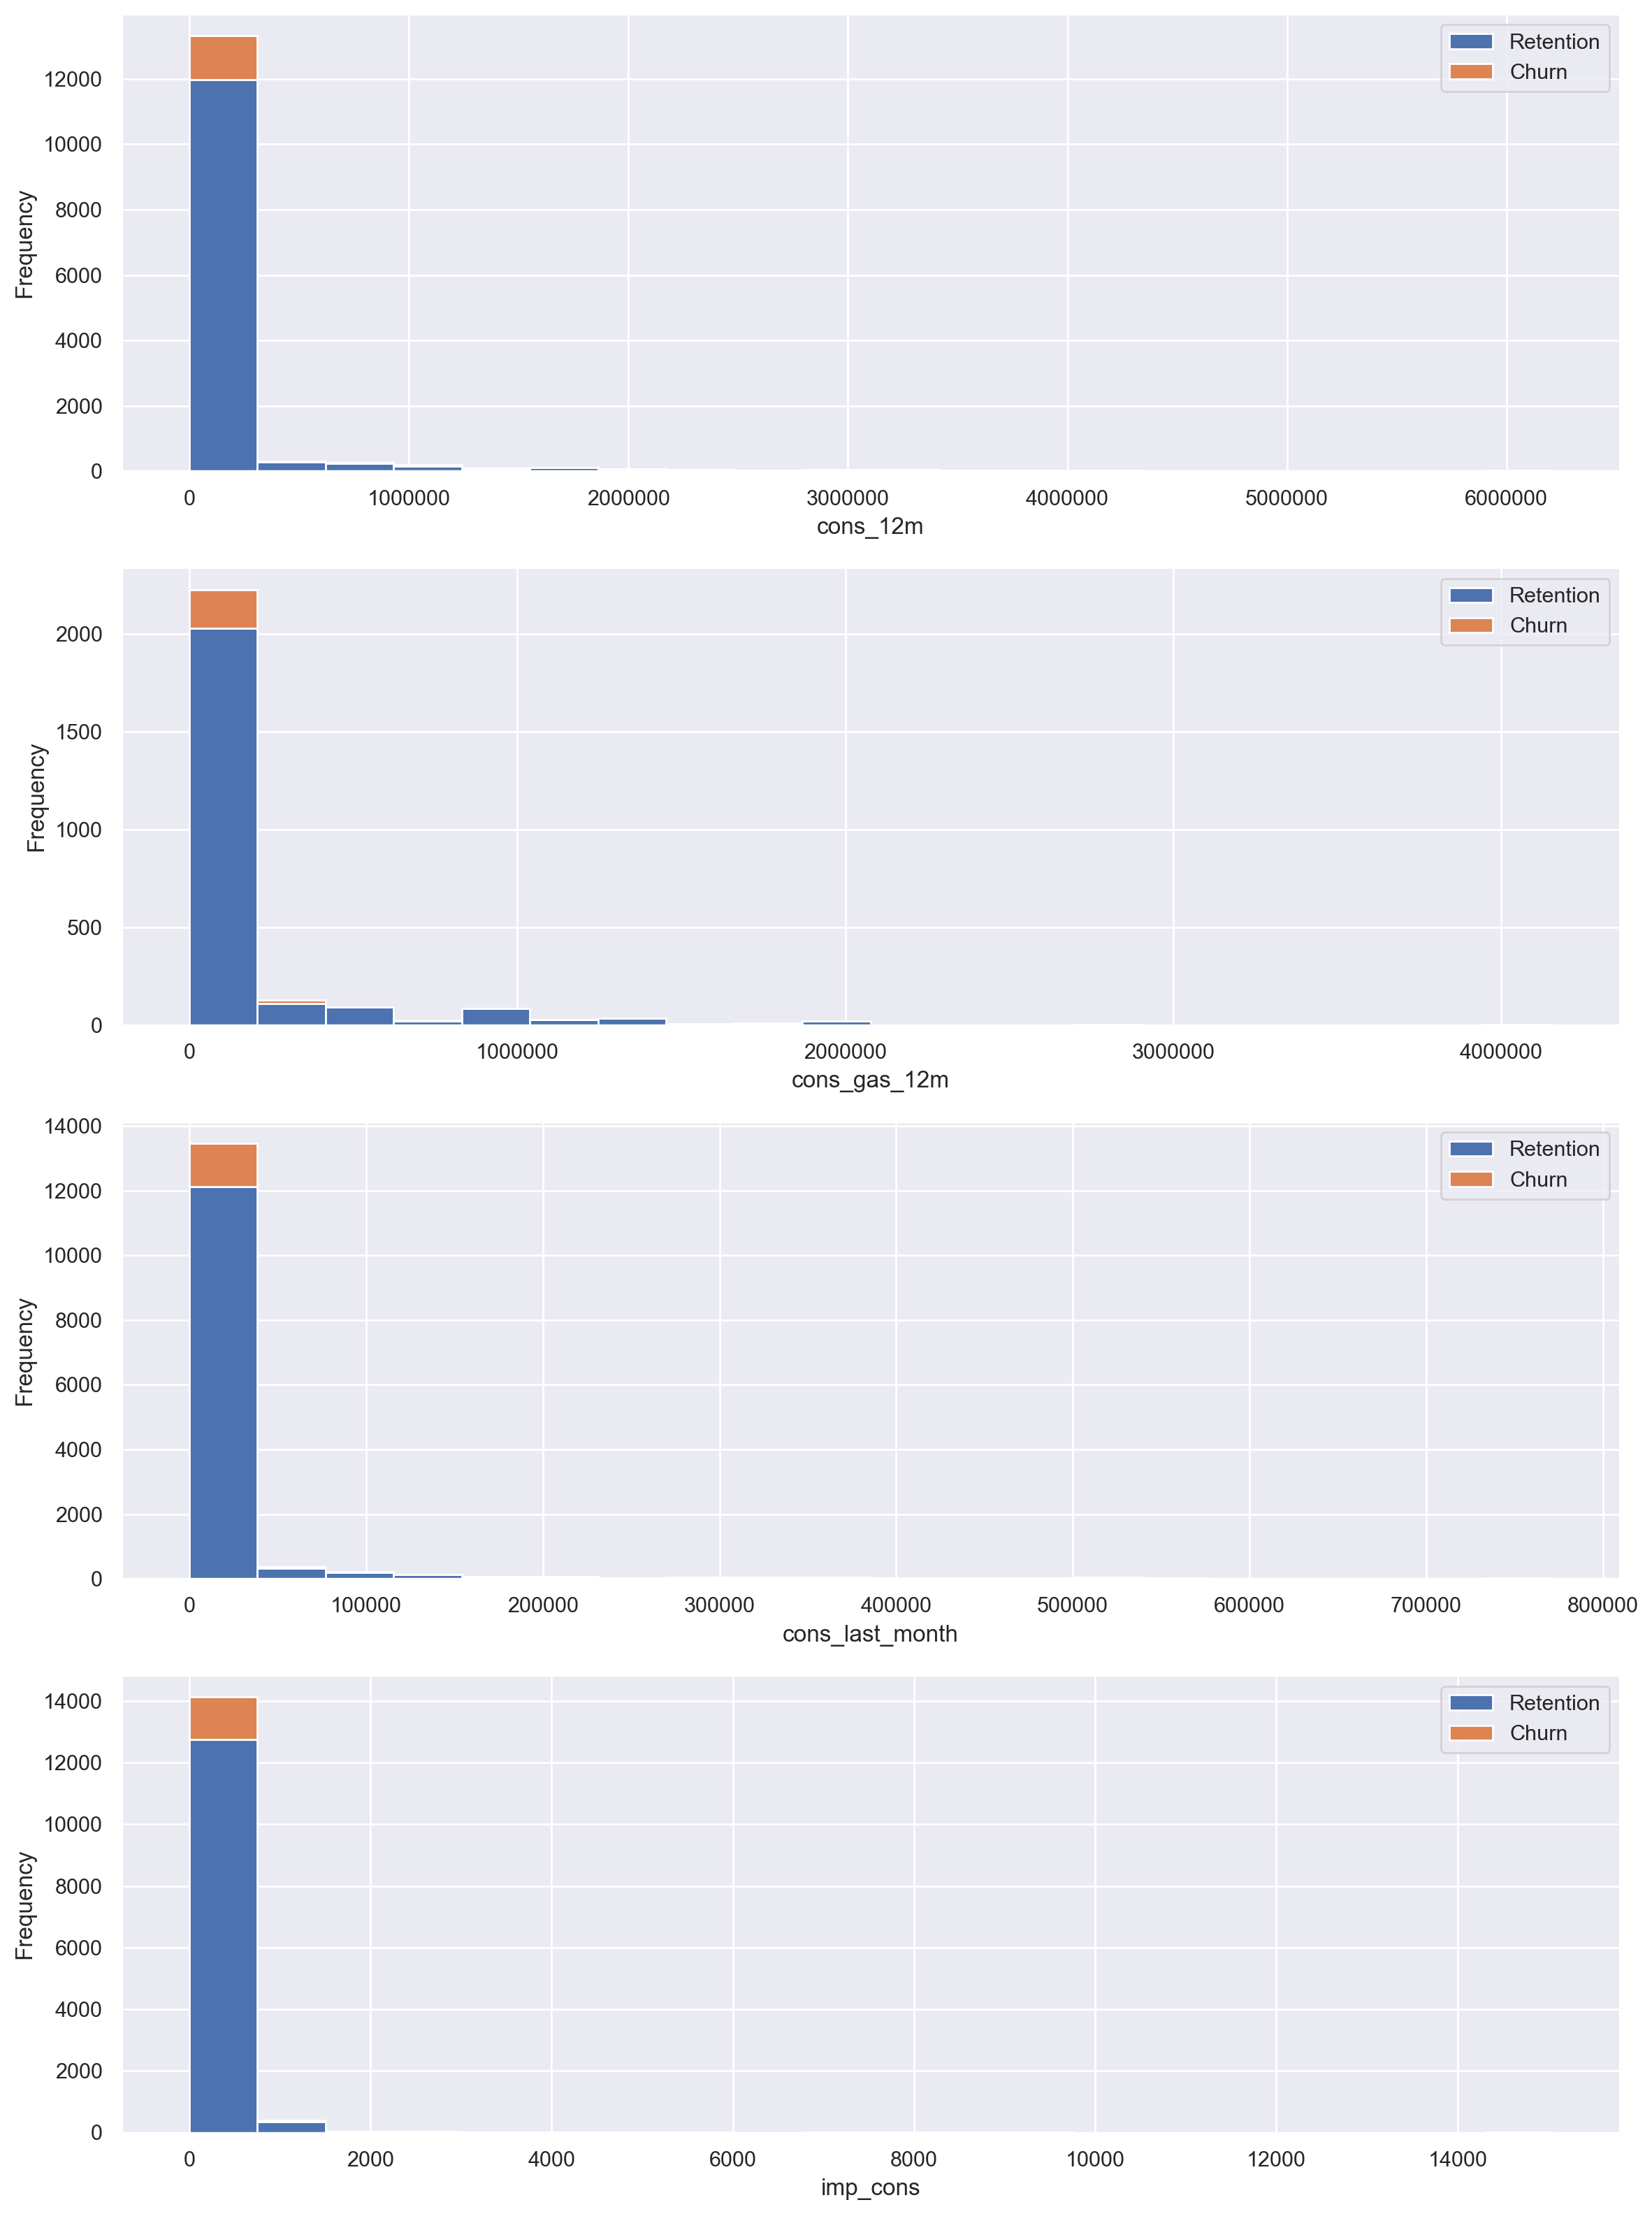

In [99]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(12, 16))

cons_12m=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['cons_12m'],
                      'Churn':consumption[consumption['churn']==1]['cons_12m']})

cons_12m[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[0],stacked=True);
axs[0].set_xlabel('cons_12m')
axs[0].ticklabel_format(style='plain',axis='x')

cons_gas_12m=pd.DataFrame({'Retention':consumption[consumption['has_gas']=='t'][consumption[consumption['has_gas']=="t"]['churn']==0]['cons_gas_12m'],
                      'Churn':consumption[consumption['has_gas']=='t'][consumption[consumption['has_gas']=='t']['churn']==1]['cons_gas_12m']})
cons_gas_12m[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[1],stacked=True);
axs[1].set_xlabel('cons_gas_12m')
axs[1].ticklabel_format(style='plain',axis='x')

cons_last_month=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['cons_last_month'],
                      'Churn':consumption[consumption['churn']==1]['cons_last_month']})
cons_last_month[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[2],stacked=True);
axs[2].set_xlabel('cons_last_month')
axs[2].ticklabel_format(style='plain',axis='x')

imp_cons=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['imp_cons'],
                      'Churn':consumption[consumption['churn']==1]['imp_cons']})
imp_cons[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[3],stacked=True);
axs[3].set_xlabel('imp_cons')
axs[3].ticklabel_format(style='plain',axis='x')

The distributions of 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas' are extremely right skewed. Outliers could be indicated by those plots. Then we use box plot to show outlier Boundaries clearly.

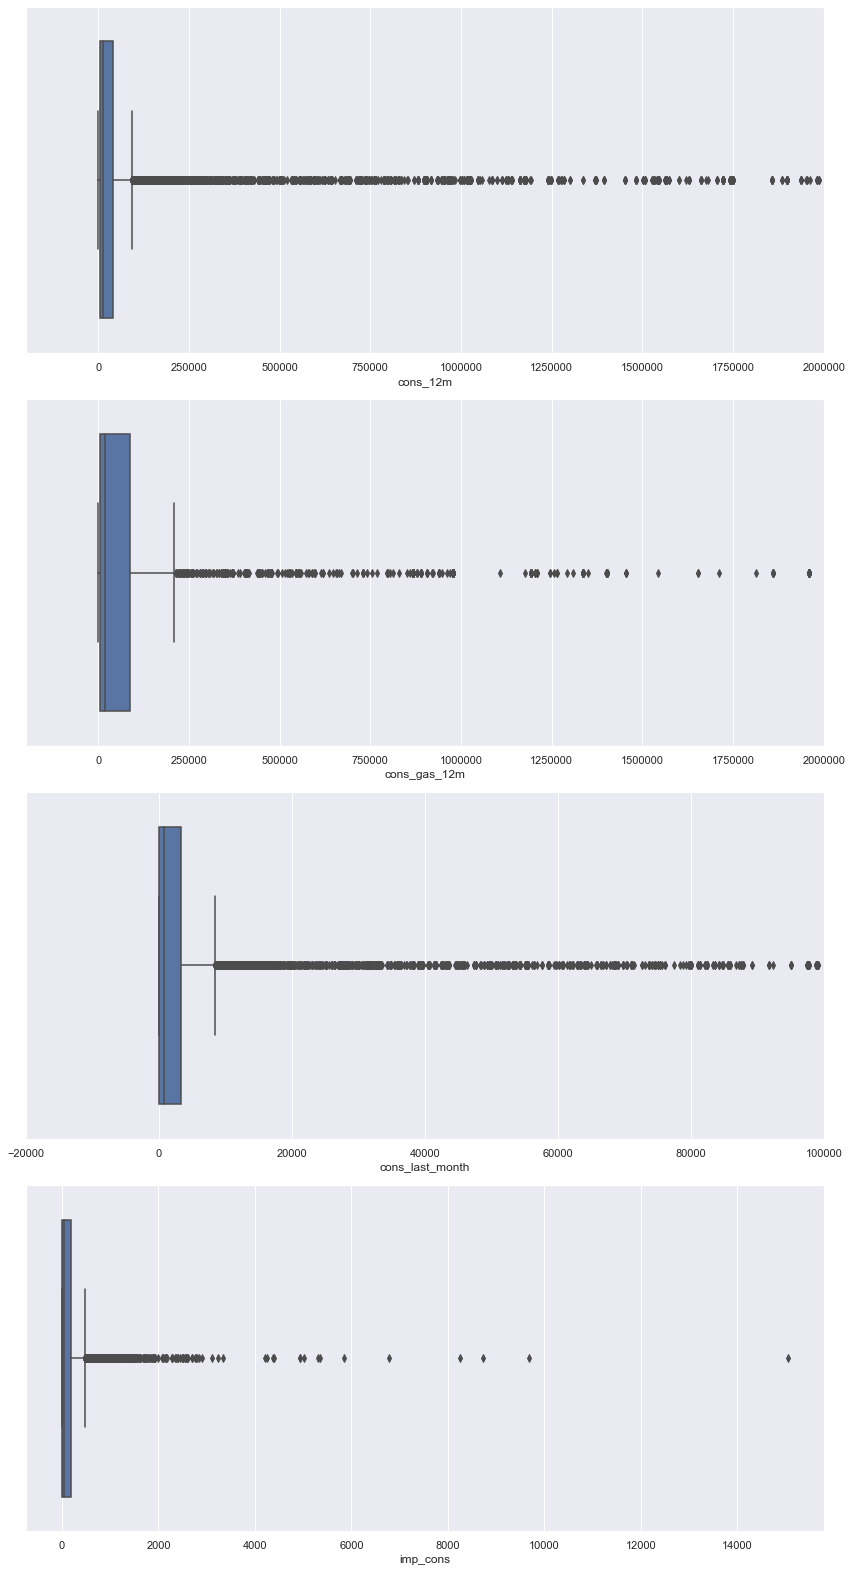

In [107]:
fig,axs=plt.subplots(nrows=4,figsize=(12,22))
sns.boxplot(consumption['cons_12m'],ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'],ax=axs[1])
sns.boxplot(consumption['cons_last_month'],ax=axs[2])
sns.boxplot(consumption['imp_cons'],ax=axs[3])
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
axs[0].set_xlim(-200000,2000000)
axs[1].set_xlim(-200000,2000000)
axs[2].set_xlim(-20000,100000)
plt.show();

In [108]:
#Now is about Dates
dates=client_df[['id','date_activ','date_end','date_modif_prod','date_renewal','churn']].copy()
dates['date_activ']=pd.to_datetime(dates['date_activ'],format='%Y-%m-%d')
dates['date_end']=pd.to_datetime(dates['date_end'],format='%Y-%m-%d')
dates['date_modif_prod']=pd.to_datetime(dates['date_modif_prod'],format='%Y-%m-%d')
dates['date_renewal']=pd.to_datetime(dates['date_renewal'],format='%Y-%m-%d')

In [110]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month=label.month_name()[:1]
    if label.month_name()=="January":
        month+=f'\n{label.year}'
    return month

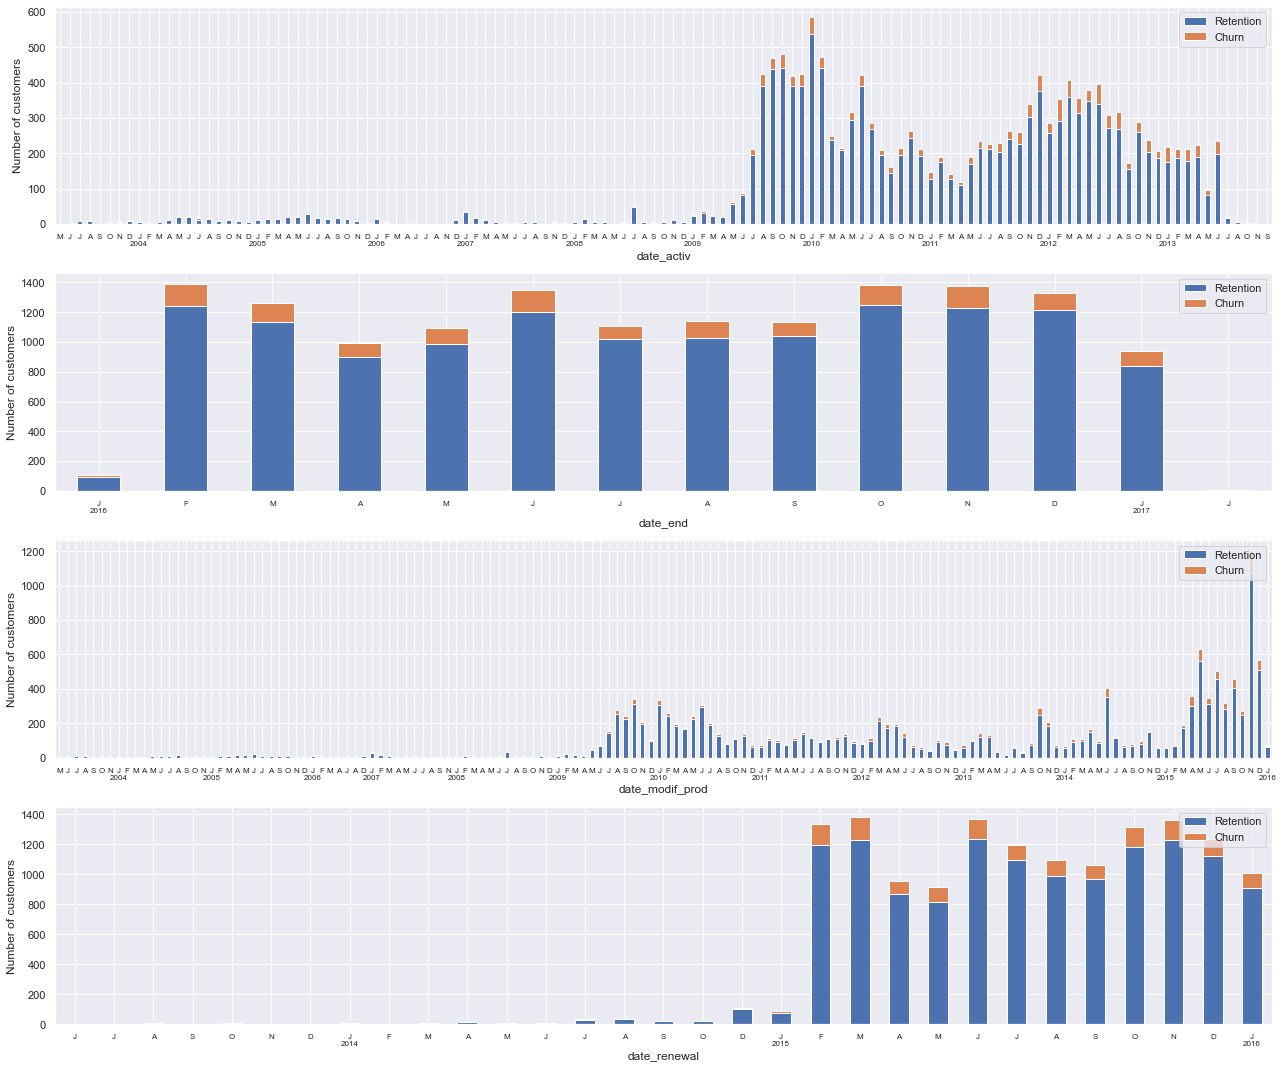

In [112]:
fig,axs=plt.subplots(nrows=4,figsize=(18,15))
date_activ=dates[['date_activ','churn','id']].set_index('date_activ').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_activ.plot(kind='bar',stacked=True,rot=0,ax=axs[0])
axs[0].set_xticklabels(map(lambda x:line_format(x),date_activ.index),fontsize=8)
axs[0].set_ylabel("Number of customers")
axs[0].legend(['Retention','Churn'],loc='upper right')
date_end=dates[['date_end','churn','id']].set_index('date_end').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_end.plot(kind='bar',stacked=True,rot=0,ax=axs[1])
axs[1].set_xticklabels(map(lambda x:line_format(x),date_end.index),fontsize=8)
axs[1].set_ylabel("Number of customers")
axs[1].legend(['Retention','Churn'],loc='upper right')
date_modif_prod=dates[['date_modif_prod','churn','id']].set_index('date_modif_prod').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_modif_prod.plot(kind='bar',stacked=True,rot=0,ax=axs[2])
axs[2].set_xticklabels(map(lambda x:line_format(x),date_modif_prod.index),fontsize=8)
axs[2].set_ylabel("Number of customers")
axs[2].legend(['Retention','Churn'],loc='upper right')
date_renewal=dates[['date_renewal','churn','id']].set_index('date_renewal').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_renewal.plot(kind='bar',stacked=True,rot=0,ax=axs[3])
axs[3].set_xticklabels(map(lambda x:line_format(x),date_renewal.index),fontsize=8)
axs[3].set_ylabel("Number of customers")
axs[3].legend(['Retention','Churn'],loc='upper right');

In [117]:
#Now is about the forecast
train=client_df[['id','forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m',
                    'forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','churn']]

In [116]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   forecast_cons_12m               14606 non-null  float64
 2   forecast_cons_year              14606 non-null  int64  
 3   forecast_discount_energy        14606 non-null  float64
 4   forecast_meter_rent_12m         14606 non-null  float64
 5   forecast_price_energy_off_peak  14606 non-null  float64
 6   forecast_price_energy_peak      14606 non-null  float64
 7   forecast_price_pow_off_peak     14606 non-null  float64
 8   churn                           14606 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


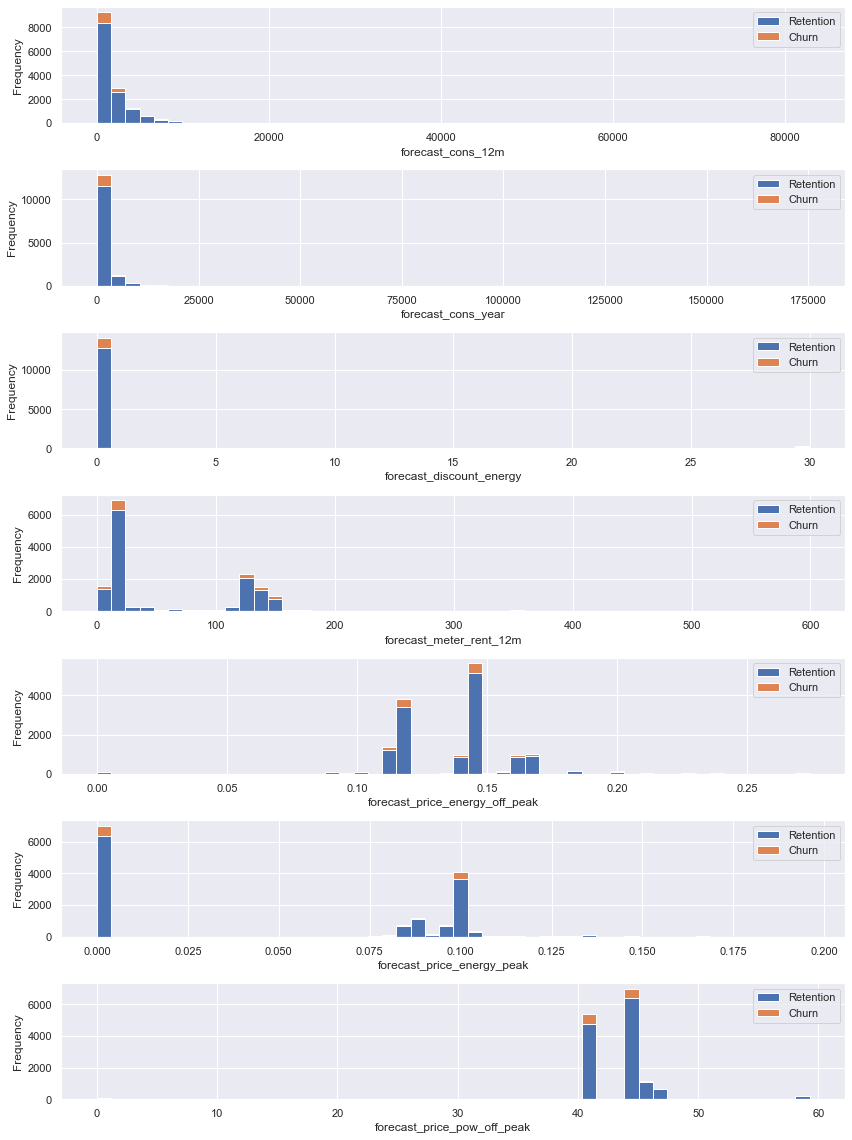

In [127]:
fig,axs=plt.subplots(nrows=7,figsize=(12,16))
forecast_cons_12m=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_cons_12m'],
                      'Churn':train[train['churn']==1]['forecast_cons_12m']})
forecast_cons_12m[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[0],stacked=True);
axs[0].set_xlabel('forecast_cons_12m')
axs[0].ticklabel_format(style='plain',axis='x')

forecast_cons_year=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_cons_year'],
                      'Churn':train[train['churn']==1]['forecast_cons_year']})
forecast_cons_year[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[1],stacked=True);
axs[1].set_xlabel('forecast_cons_year')
axs[1].ticklabel_format(style='plain',axis='x')

forecast_discount_energy=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_discount_energy'],
                      'Churn':train[train['churn']==1]['forecast_discount_energy']})
forecast_discount_energy[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[2],stacked=True);
axs[2].set_xlabel('forecast_discount_energy')
axs[2].ticklabel_format(style='plain',axis='x')

forecast_meter_rent_12m=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_meter_rent_12m'],
                      'Churn':train[train['churn']==1]['forecast_meter_rent_12m']})
forecast_meter_rent_12m[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[3],stacked=True);
axs[3].set_xlabel('forecast_meter_rent_12m')
axs[3].ticklabel_format(style='plain',axis='x')

forecast_price_energy_off_peak=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_price_energy_off_peak'],
                      'Churn':train[train['churn']==1]['forecast_price_energy_off_peak']})
forecast_price_energy_off_peak[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[4],stacked=True);
axs[4].set_xlabel('forecast_price_energy_off_peak')
axs[4].ticklabel_format(style='plain',axis='x')

forecast_price_energy_peak=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_price_energy_peak'],
                      'Churn':train[train['churn']==1]['forecast_price_energy_peak']})
forecast_price_energy_peak[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[5],stacked=True);
axs[5].set_xlabel('forecast_price_energy_peak')
axs[5].ticklabel_format(style='plain',axis='x')

forecast_price_pow_off_peak=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_price_pow_off_peak'],
                      'Churn':train[train['churn']==1]['forecast_price_pow_off_peak']})
forecast_price_pow_off_peak[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[6],stacked=True);
axs[6].set_xlabel('forecast_price_pow_off_peak')
axs[6].ticklabel_format(style='plain',axis='x')